# Import bibliotek i ładowanie bibliotek

In [100]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import feature_selection
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('data_eda.csv')
df=df.rename(columns={'Unnamed: 0': 'index_0'})
df

,index_0,pages,stars,reviews,series,mix,character,plot,funny,lighthearted,...,author_stars,Fiction,Nonfiction,Literary,Fantasy,Crime,Social,Children,Romans,Realism
0,0,273,4.00,2017,0,0.44,0.51,0.02,0.27,0.37,...,4.305000,1,1,0,0,0,1,0,1,1
1,1,302,3.78,7330,0,0.39,0.42,0.17,0.03,0.01,...,3.670000,1,0,0,0,1,0,0,0,0
2,2,400,4.15,16761,0,0.51,0.39,0.08,0.02,0.01,...,0.000000,1,0,1,0,0,0,0,0,0
3,3,459,4.16,2128,1,0.48,0.10,0.40,0.04,0.02,...,0.000000,1,0,0,1,0,0,0,0,0
4,4,160,3.65,6634,1,0.28,0.16,0.54,0.92,0.73,...,4.115000,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,6925,432,4.15,30643,0,0.48,0.05,0.46,0.00,0.00,...,3.856667,1,0,0,1,1,0,0,0,0
6926,6926,352,3.62,1058,0,0.55,0.13,0.30,0.15,0.10,...,3.700000,1,0,0,1,0,1,0,0,0
6927,6927,535,3.88,30975,1,0.45,0.08,0.45,0.14,0.19,...,3.870000,1,0,0,1,0,0,1,0,0
6928,6928,472,3.88,5914,1,0.64,0.12,0.22,0.07,0.00,...,3.660000,1,0,0,1,0,0,1,0,0


$\text{Posiłkując się informacjami z EDA przeprowadzimy Feature Engineering.}$<p>

In [103]:
categorical_features = ['series', 'Fiction', 'Nonfiction', 'Literary', 'Fantasy','Crime',
       'Social', 'Children', 'Romans', 'Realism']
target = "stars"
continous_features = df.columns.difference(categorical_features + [target]+['index_0']).tolist()
features=df.columns.difference([target]+['index_0']).tolist()

$\text{W pierwszym kroku sprawdzamy jak dostępne zmienne informują nas o zmiennej objaśnianej za pomocą mutual information.}$<p>

In [13]:
minfos_1={}

for var in features:
    minfos_1[var] = round(feature_selection.mutual_info_regression(df[var].values.reshape(-1,1),df[target].values)[0],20)
    
minfos_1=dict(sorted(minfos_1.items(), key=lambda item: item[1], reverse=True))
minfos_1

{'author_stars': 0.28568977944824203,
 'inspiring': 0.13245612311457133,
 'mix': 0.1272732650705981,
 'emotional': 0.12265640359666197,
 'hopeful': 0.11028318080527022,
 'mysterious': 0.0956353840843498,
 'informative': 0.07989080444284857,
 'challenging': 0.07786839419648572,
 'adventurous': 0.07651318027044063,
 'plot': 0.07565025872823661,
 'dark': 0.07166266465257465,
 'character': 0.06421644151752126,
 'reflective': 0.06190684524907652,
 'sad': 0.059358752715588985,
 'funny': 0.04964032568889288,
 'tense': 0.0490374358684651,
 'Nonfiction': 0.04510229930992482,
 'lighthearted': 0.03478000490805533,
 'Fiction': 0.03301625479228876,
 'reviews': 0.025985677456591638,
 'Crime': 0.023920153826254786,
 'pages': 0.022386453950858698,
 'Social': 0.01933508247626814,
 'relaxing': 0.01735952846253408,
 'Romans': 0.012427287703550283,
 'Fantasy': 0.00913509279042879,
 'author_count': 0.005821856792330493,
 'Children': 0.005712170350658186,
 'Realism': 0.0010126716457052876,
 'Literary': 0,
 

$\text{Zmienne o bardzo niskiej wartości MI: Literary, Children, Realism oraz series.}$<p>

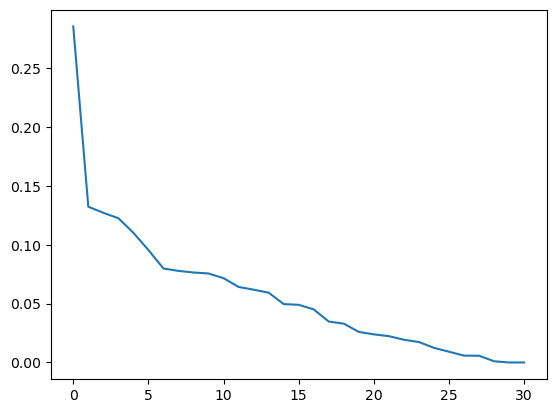

In [14]:
plt.plot(minfos_1.values())

$\text{Więc następnie zobaczymy czy przy interakcji zmiennych kategorycznych i numerycznych utworzymy zmienne, które dobrze wyjaśniają zmienna objaśnianą.}$<p>

In [15]:
df_added=df.copy()

In [16]:
import warnings
warnings.filterwarnings("ignore")

for category in categorical_features:
    for continous in continous_features:
        df_added["{}_{}".format(category,continous)]=df_added[category]*df_added[continous]
    
features_all=df_added.columns.difference([target]+['index_0']).tolist()

In [17]:
minfos_2={}

for var in features_all:
    minfos_2[var] = round(feature_selection.mutual_info_regression(df_added[var].values.reshape(-1,1),df_added[target].values)[0],20)
    
minfos_2=dict(sorted(minfos_2.items(), key=lambda item: item[1], reverse=True))
minfos_2

{'author_stars': 0.2909759483026031,
 'Fiction_author_stars': 0.2271753680637274,
 'Fiction_emotional': 0.14578901697478042,
 'inspiring': 0.14030735388913929,
 'mix': 0.1368720536232617,
 'Fiction_mix': 0.12887866424923455,
 'emotional': 0.11863016998175889,
 'series_author_stars': 0.11458684916466266,
 'hopeful': 0.11070688383096883,
 'Fantasy_author_stars': 0.10099993726971766,
 'mysterious': 0.0981732477874324,
 'Fiction_hopeful': 0.09460112298099775,
 'Fiction_mysterious': 0.09181964735467929,
 'Literary_author_stars': 0.0897582186672441,
 'Fiction_adventurous': 0.08121485124950212,
 'Fiction_character': 0.07843295904076619,
 'Literary_emotional': 0.07678773256239824,
 'Fiction_inspiring': 0.07651290732178229,
 'Fantasy_mix': 0.07493205167249029,
 'challenging': 0.07454473599831424,
 'adventurous': 0.07395654304033439,
 'Fiction_tense': 0.07238033421659562,
 'Literary_inspiring': 0.07189016757246591,
 'character': 0.06779482411960647,
 'informative': 0.06769721401464457,
 'dark': 

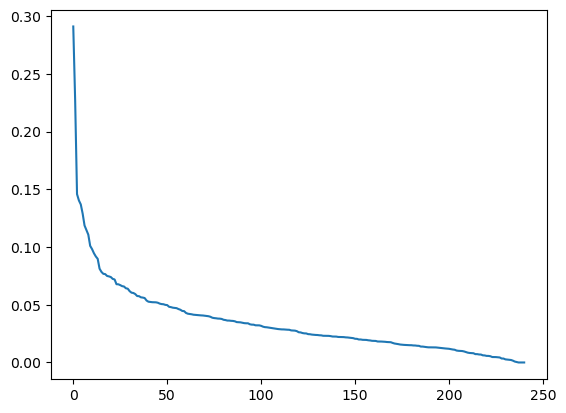

In [18]:
plt.plot(minfos_2.values())

$\text{Na podstawie analizy wykresu odetniemy zmienne z interakcją, które dodamy do zbioru na poziomie MI=0.05.}$<p>

In [19]:
categories=[]
for i,j in minfos_2.items():
    if j>0.05:
        categories.append(i)
print(categories)

['author_stars', 'Fiction_author_stars', 'Fiction_emotional', 'inspiring', 'mix', 'Fiction_mix', 'emotional', 'series_author_stars', 'hopeful', 'Fantasy_author_stars', 'mysterious', 'Fiction_hopeful', 'Fiction_mysterious', 'Literary_author_stars', 'Fiction_adventurous', 'Fiction_character', 'Literary_emotional', 'Fiction_inspiring', 'Fantasy_mix', 'challenging', 'adventurous', 'Fiction_tense', 'Literary_inspiring', 'character', 'informative', 'dark', 'reflective', 'Fiction_reflective', 'Social_author_stars', 'Fiction_challenging', 'plot', 'Nonfiction_author_stars', 'series_mix', 'Fiction_plot', 'Nonfiction_challenging', 'Fiction_sad', 'Fiction_funny', 'sad', 'tense', 'series_adventurous', 'Literary_mix', 'Fiction_dark', 'Children_author_stars', 'Literary_challenging', 'Fantasy_hopeful', 'Realism_author_stars', 'Fiction_pages', 'Romans_author_stars', 'Fantasy_inspiring']


$\text{Po dodaniu zmiennych w interakcji widzimy, że zmienna series lepiej informuje o zmiennej objaśnianej w interakcji ze zmienną author_stars, mix, emotional oraz inspiring.}$<p>
$\text{Zmienna Literary sama mało informująca o wartości zmiennej objaśnianej w interkacji ze zmiennymi: author_stars, inspiring, emotional oraz challenging o wiele lepiej objaśnia zmienną.}$<p>
$\text{Niestety w przypadku zmiennych Children i Realism nie uzyskaliśmy tak wyraźnej nie uzyskaliśmy poprawy.}$<p>

In [20]:
df_new=df_added.copy()
for column in df_added.columns:
    if column not in categories:
        df_new = df_new.drop(columns=[column])
cols_to_use = df_new.columns.difference(df.columns)
df_added = pd.merge(df, df_new[cols_to_use], left_index=True, right_index=True, how='outer')

$\text{Przechodząc do zmiennych ciągłych widzimy, że zmienne relaxing, reviews oraz pages nadal mało informują o zmiennej objaśniającej.}$<p>
$\text{Znając ich rozkłady z EDA wiemy, że relaxing jest prawostronnie skośny, tak samo jak reviews, a zmienna pages również ma długi prawy ogon.}$<p>
$\text{Zaczniemy więc od transformacji logarytmicznej.}$<p>

In [110]:
df_log=df.copy()
for column in continous_features:
    df_log["{}_log".format(column)]=np.log(df_log[column].replace(0, np.nan))
    df_log["{}_log".format(column)]=df_log["{}_log".format(column)].replace(np.nan,0)

features_log=df_log.columns.difference(features_all+[target]+['index_0']).tolist()

minfos_3={}

for var in features_log+continous_features:
    minfos_3[var] = round(feature_selection.mutual_info_regression(df_log[var].values.reshape(-1,1),df_log[target].values)[0],20)
    
minfos_3=dict(sorted(minfos_3.items(), key=lambda item: item[1], reverse=True))
minfos_3

{'author_stars': 0.2898385614030352,
 'author_stars_log': 0.2787843629215714,
 'inspiring': 0.14203016167013338,
 'mix': 0.13423472250691404,
 'inspiring_log': 0.12814374732526979,
 'mix_log': 0.12480775350141471,
 'emotional': 0.1167871042929418,
 'emotional_log': 0.11573595484783629,
 'hopeful_log': 0.10290362166157152,
 'hopeful': 0.10183628372853537,
 'mysterious': 0.08848456678114314,
 'reviews_log': 0.08829049022212132,
 'informative': 0.07884305378910783,
 'adventurous_log': 0.07805492506973799,
 'adventurous': 0.0774000433846469,
 'plot': 0.07593062385614768,
 'character': 0.07398972956177641,
 'character_log': 0.07324575616356199,
 'challenging_log': 0.07236795978822474,
 'informative_log': 0.07161621058729617,
 'mysterious_log': 0.07131596725036538,
 'reflective_log': 0.06866471679113495,
 'challenging': 0.06830766334682004,
 'reflective': 0.06778285376515303,
 'dark_log': 0.06689080553973703,
 'sad': 0.06681456876593206,
 'dark': 0.06310293134080958,
 'plot_log': 0.054891747

$\text{Poprawa jedynie dla zmiennych: reviews_log, challenging_log, character_log, sad_log, lighthearted_log, lecz dla zmiennej reviews znaczna.}$<p>
$\text{Użyjemy dlatego bardziej zaawansowanych transformacji zmiennych, gdyż nadal większość zmiennych ciągłych ma rozkład prawostronny.}$<p>
$\text{Mianowicie metod: Boxcox, Standard Scaler, Robust Scaler, MinMaxScaler, QuantileTransformer.}$<p>

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

df_trans=df_log.copy()
for column in continous_features:
    df_trans[column]=df_trans[column].replace(0, np.nan)
    df_trans=df_trans.sort_values(by=[column]).reset_index(drop=True)
    df_trans["{}_boxcox".format(column)]=0
    df_trans["{}_boxcox".format(column)][df_trans[column].first_valid_index():df_trans[column].last_valid_index()+1], _=stats.boxcox(df_trans[column][df_trans[column].first_valid_index():df_trans[column].last_valid_index()+1])
    df_trans=df_trans.sort_values(by=[column]).reset_index(drop=True)
    df_trans["{}_boxcox".format(column)]=df_trans["{}_boxcox".format(column)]*-1
    df_trans[column]=df_trans[column].replace(np.nan,0)

df_trans=df_trans.sort_values(by=['index_0']).reset_index(drop=True)

df_trans_ss=df.copy()
df_trans_ss=StandardScaler().fit_transform(df_trans_ss[continous_features])
df_trans_ss=pd.DataFrame(data=df_trans_ss,index=range(0,6930),columns=[s + "_ss" for s in continous_features])
df_trans = pd.merge(df_trans, df_trans_ss,left_index=True, right_index=True, how='outer')   

df_trans_rs=df.copy()
df_trans_rs=RobustScaler().fit_transform(df_trans_rs[continous_features])
df_trans_rs=pd.DataFrame(data=df_trans_rs,index=range(0,6930),columns=[s + "_rs" for s in continous_features])
df_trans = pd.merge(df_trans, df_trans_rs,left_index=True, right_index=True, how='outer')   

df_trans_mm=df.copy()
df_trans_mm=MinMaxScaler().fit_transform(df_trans_mm[continous_features])
df_trans_mm=pd.DataFrame(data=df_trans_mm,index=range(0,6930),columns=[s + "_mm" for s in continous_features])
df_trans = pd.merge(df_trans, df_trans_mm,left_index=True, right_index=True, how='outer')   

df_trans_qt=df.copy()
df_trans_qt=QuantileTransformer().fit_transform(df_trans_qt[continous_features])
df_trans_qt=pd.DataFrame(data=df_trans_qt,index=range(0,6930),columns=[s + "_qt" for s in continous_features])
df_trans = pd.merge(df_trans, df_trans_qt,left_index=True, right_index=True, how='outer') 

features_trans=df_trans.columns.difference([target]+['index_0']).tolist()

minfos_4={}

for var in features_trans:
    minfos_4[var] = round(feature_selection.mutual_info_regression(df_trans[var].values.reshape(-1,1),df_trans[target].values)[0],20)
    
minfos_4=dict(sorted(minfos_4.items(), key=lambda item: item[0], reverse=True))
minfos_4   

{'tense_ss': 0.05462952377411501,
 'tense_rs': 0.051641153241636324,
 'tense_qt': 0.04111521024857634,
 'tense_mm': 0.056791115943616084,
 'tense_log': 0.04542851911849066,
 'tense_boxcox': 0.048054757255743034,
 'tense': 0.06088826979332218,
 'series': 0.003199277429487113,
 'sad_ss': 0.05107507957277058,
 'sad_rs': 0.05679457640515118,
 'sad_qt': 0.049638063937890387,
 'sad_mm': 0.05946149609017403,
 'sad_log': 0.05345238307128053,
 'sad_boxcox': 0.051675078515795995,
 'sad': 0.05835809431119543,
 'reviews_ss': 0.08247785116789963,
 'reviews_rs': 0.07967212084091546,
 'reviews_qt': 0.08113000524317737,
 'reviews_mm': 0.08286219980462128,
 'reviews_log': 0.08407592002024966,
 'reviews_boxcox': 0.08781828831899663,
 'reviews': 0.025401149420144268,
 'relaxing_ss': 0.015433997032838764,
 'relaxing_rs': 0.021971189551969417,
 'relaxing_qt': 0.018058156466826514,
 'relaxing_mm': 0.015307295984046563,
 'relaxing_log': 0.0233836613170042,
 'relaxing_boxcox': 0.017309321743370187,
 'relaxing

$\text{Widzimy poprawę dla prawie wszystkich zmiennych ciągłych.}$<p>

In [117]:
continous_transformations=['tense', 'sad_mm', 'reviews_boxcox','relaxing', 
'reflective_boxcox', 'plot_qt', 'pages_qt', 'mysterious_rs','mix_qt',
'lighthearted_mm','inspiring_log','informative_boxcox','hopeful_rs',
'funny_qt','emotional_boxcox','dark_ss', 'character_ss','challenging_mm',
'author_stars','author_count_ss','adventurous_qt']
df_ = pd.merge(df[categorical_features + [target]+['index_0']], df_trans[continous_transformations], left_index=True, right_index=True, how='outer')
df_

,series,Fiction,Nonfiction,Literary,Fantasy,Crime,Social,Children,Romans,Realism,...,informative_boxcox,hopeful_rs,funny_qt,emotional_boxcox,dark_ss,character_ss,challenging_mm,author_stars,author_count_ss,adventurous_qt
0,0,1,1,0,0,0,1,0,1,1,...,6.656129,1.730769,0.687187,0.091363,-1.087573,0.719774,0.072917,4.305000,-0.229402,0.378378
1,0,1,0,0,0,1,0,0,0,0,...,-0.000000,-0.500000,0.280280,1.014531,1.023268,0.380380,0.093750,3.670000,-0.372598,0.309309
2,0,1,0,1,0,0,0,0,0,0,...,2.620342,0.846154,0.230230,0.122459,-0.777155,0.267249,0.187500,0.000000,-0.515794,0.544044
3,1,1,0,0,1,0,0,0,0,0,...,3.789578,-0.384615,0.320320,1.233107,-0.466738,-0.826353,0.156250,0.000000,-0.515794,0.937437
4,1,1,0,0,1,0,0,0,0,0,...,6.656129,-0.384615,0.987988,-0.000000,-1.056531,-0.600091,0.000000,4.115000,3.207294,0.829329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,0,1,0,0,1,1,0,0,0,0,...,3.506684,-0.192308,0.000000,0.682787,0.526599,-1.014905,0.354167,3.856667,0.343380,0.766767
6926,0,1,0,0,1,0,1,0,0,0,...,2.197277,2.153846,0.571071,0.899293,-0.839239,-0.713222,0.312500,3.700000,-0.229402,0.766767
6927,1,1,0,0,1,0,0,1,0,0,...,-0.000000,0.500000,0.555556,0.808695,-0.404654,-0.901774,0.052083,3.870000,-0.229402,0.952953
6928,1,1,0,0,1,0,0,1,0,0,...,-0.000000,-0.346154,0.412412,0.737477,1.582020,-0.750932,0.291667,3.660000,-0.372598,0.776777


$\text{Powtórzymy procedurę wyboru interkacji zmiennych dla przetransformowanych zmiennych ciągłych.}$<p>

In [133]:
df_added=df_.copy()

categorical_features = ['series', 'Fiction', 'Nonfiction', 'Literary', 'Fantasy','Crime',
       'Social', 'Children', 'Romans', 'Realism']
target = "stars"
continous_features = df_.columns.difference(categorical_features + [target]+['index_0']).tolist()
features=df_.columns.difference([target]+['index_0']).tolist()

for category in categorical_features:
    for continous in continous_features:
        df_added["{}_{}".format(category,continous)]=df_added[category]*df_added[continous]
    
features_all=df_added.columns.difference([target]+['index_0']).tolist()

In [121]:
minfos_5={}

for var in features_all:
    minfos_5[var] = round(feature_selection.mutual_info_regression(df_added[var].values.reshape(-1,1),df_added[target].values)[0],20)
    
minfos_5=dict(sorted(minfos_5.items(), key=lambda item: item[1], reverse=True))
minfos_5

{'author_stars': 0.2879318335544645,
 'Fiction_author_stars': 0.23181269850222777,
 'Fiction_mix_qt': 0.13666344132347596,
 'Fiction_emotional_boxcox': 0.13389593588034465,
 'mix_qt': 0.13183509125939707,
 'inspiring_log': 0.12455370832600819,
 'Fiction_hopeful_rs': 0.12059389730901592,
 'emotional_boxcox': 0.11219667751042195,
 'series_author_stars': 0.11114927156890221,
 'hopeful_rs': 0.10860675152422683,
 'Fantasy_author_stars': 0.1070229895692232,
 'Fiction_reviews_boxcox': 0.10132615940916212,
 'Literary_author_stars': 0.09482358846117167,
 'mysterious_rs': 0.09020396118135654,
 'Fiction_mysterious_rs': 0.08933855320024442,
 'Fiction_inspiring_log': 0.0877158156465212,
 'reviews_boxcox': 0.08678745164520496,
 'adventurous_qt': 0.08274407406346995,
 'informative_boxcox': 0.08198628087322302,
 'plot_qt': 0.08087540476622657,
 'Fiction_dark_ss': 0.08054202202743888,
 'Fiction_adventurous_qt': 0.07795176072539256,
 'Fiction_author_count_ss': 0.07644452385111533,
 'challenging_mm': 0.0

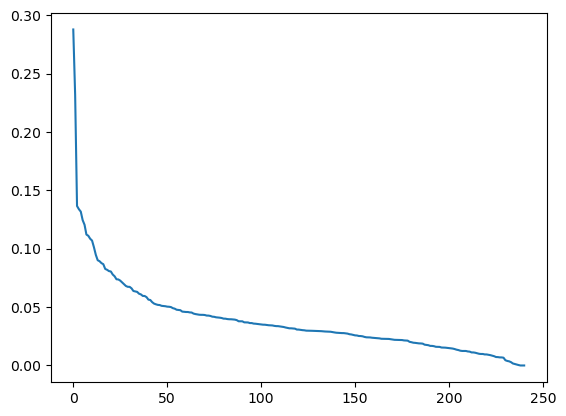

In [122]:
plt.plot(minfos_5.values())

In [123]:
categories=[]
for i,j in minfos_2.items():
    if j>0.05:
        categories.append(i)
print(categories)

['author_stars', 'Fiction_author_stars', 'Fiction_mix_qt', 'Fiction_emotional_boxcox', 'mix_qt', 'inspiring_log', 'Fiction_hopeful_rs', 'emotional_boxcox', 'series_author_stars', 'hopeful_rs', 'Fantasy_author_stars', 'Fiction_reviews_boxcox', 'Literary_author_stars', 'mysterious_rs', 'Fiction_mysterious_rs', 'Fiction_inspiring_log', 'reviews_boxcox', 'adventurous_qt', 'informative_boxcox', 'plot_qt', 'Fiction_dark_ss', 'Fiction_adventurous_qt', 'Fiction_author_count_ss', 'challenging_mm', 'Fiction_character_ss', 'Literary_emotional_boxcox', 'Fiction_tense', 'Fiction_plot_qt', 'Fantasy_mix_qt', 'Fiction_pages_qt', 'series_mix_qt', 'Social_author_stars', 'reflective_boxcox', 'dark_ss', 'character_ss', 'Literary_mysterious_rs', 'series_author_count_ss', 'Fantasy_inspiring_log', 'Fiction_challenging_mm', 'Fiction_sad_mm', 'Nonfiction_author_stars', 'Literary_mix_qt', 'Literary_hopeful_rs', 'Literary_challenging_mm', 'Literary_inspiring_log', 'funny_qt', 'Romans_author_stars', 'Fiction_refl

In [147]:
df_new=df_added.copy()
for column in df_added.columns:
    if column not in categories:
        df_new = df_new.drop(columns=[column])
cols_to_use = df_new.columns.difference(df_.columns)
df_added = pd.merge(df_, df_new[cols_to_use], left_index=True, right_index=True, how='outer')

$\text{Mamy obecnie bardzo dużo zmiennych i pewnie liczba tych skorelowanych ze sobą się zwiększyła:.}$<p>

In [135]:
features_all=df_added.columns.difference([target]+['index_0']).tolist()
i = 0
while(i < len(features_all)):
    j = i+1
    while(j < len(features_all)):
        if(stats.spearmanr(df_added[features_all[i]], df_added[features_all[j]]).pvalue < 0.05 and
          stats.spearmanr(df_added[features_all[i]], df_added[features_all[j]]).statistic>0.79):
            print("Korelacja między {} i {} jest statystycznie istotna i wynosi: {}.".format(features_all[i], features_all[j], round(stats.spearmanr(df_added[features_all[i]], df_added[features_all[j]]).statistic, 3)))
        j = j + 1
    i = i + 1

Korelacja między Fantasy i Fantasy_author_stars jest statystycznie istotna i wynosi: 0.79.
Korelacja między Fantasy i Fantasy_mix_qt jest statystycznie istotna i wynosi: 0.966.
Korelacja między Fiction_adventurous_qt i adventurous_qt jest statystycznie istotna i wynosi: 0.952.
Korelacja między Fiction_author_count_ss i author_count_ss jest statystycznie istotna i wynosi: 0.849.
Korelacja między Fiction_author_stars i author_stars jest statystycznie istotna i wynosi: 0.868.
Korelacja między Fiction_character_ss i character_ss jest statystycznie istotna i wynosi: 0.807.
Korelacja między Fiction_dark_ss i dark_ss jest statystycznie istotna i wynosi: 0.905.
Korelacja między Fiction_hopeful_rs i hopeful_rs jest statystycznie istotna i wynosi: 0.928.
Korelacja między Fiction_inspiring_log i inspiring_log jest statystycznie istotna i wynosi: 0.918.
Korelacja między Fiction_mix_qt i mix_qt jest statystycznie istotna i wynosi: 1.0.
Korelacja między Fiction_mysterious_rs i mysterious_rs jest sta

In [137]:
minfos_6={}

for var in features_all:
    minfos_6[var] = round(feature_selection.mutual_info_regression(df_added[var].values.reshape(-1,1),df_added[target].values)[0],20)
    
minfos_6=dict(sorted(minfos_6.items(), key=lambda item: item[1], reverse=True))
minfos_6

{'author_stars': 0.28957375167281674,
 'Fiction_author_stars': 0.22858092902178972,
 'Fiction_emotional_boxcox': 0.13941592650891188,
 'mix_qt': 0.1351079322519002,
 'inspiring_log': 0.13438733442388795,
 'series_author_stars': 0.12907647016128942,
 'Fiction_mix_qt': 0.12848441343712302,
 'Fiction_hopeful_rs': 0.12736740020614157,
 'emotional_boxcox': 0.11985064451773031,
 'Fantasy_author_stars': 0.1089154996720838,
 'hopeful_rs': 0.10781851358098127,
 'Fiction_reviews_boxcox': 0.09941961691796442,
 'Fiction_mysterious_rs': 0.09708851838211528,
 'Literary_author_stars': 0.0923312660440585,
 'Fiction_adventurous_qt': 0.09077555124674763,
 'reviews_boxcox': 0.0872245084740495,
 'mysterious_rs': 0.08319397351309377,
 'Fiction_dark_ss': 0.08251147308868756,
 'Fiction_author_count_ss': 0.08165732422966787,
 'Fiction_plot_qt': 0.08106631592273938,
 'challenging_mm': 0.08059919751273448,
 'Fiction_character_ss': 0.08028677667271023,
 'plot_qt': 0.0798422560592611,
 'Fiction_inspiring_log': 0.

$\text{Na podstwie dwóch powyższych informacji warto usunąć kolumny: Fantasy, Literary,}$<p>
$\text{Fiction_author_stars, adventurous_qt, author_count_ss, character_ss, dark_ss,}$<p>
$\text{hopeful_rs, Fiction_inspiring_log, Fiction_mix_qt, mysterious_rs, pages_qt,}$<p>
$\text{plot_qt, Fiction_reflective_boxcox, reviews_boxcox, sad_mm, tense, Literary_challenging_mm,}$<p>
$\text{Literary_mix_qt, Nonfiction, Romans, series, series_adventurous_qt}$<p>

In [151]:
correlated=['Fantasy', 'Literary','Fiction_author_stars', 'adventurous_qt', 'author_count_ss', 'character_ss', 'dark_ss',
'hopeful_rs', 'Fiction_inspiring_log', 'Fiction_mix_qt', 'mysterious_rs', 'pages_qt',
'plot_qt', 'Fiction_reflective_boxcox', 'reviews_boxcox', 'sad_mm', 'tense', 'Literary_challenging_mm',
'Literary_mix_qt', 'Nonfiction', 'Romans', 'series', 'series_adventurous_qt']
df_fin = df_added.drop(columns=correlated)
df_fin

,Fiction,Crime,Social,Children,Realism,stars,index_0,relaxing,reflective_boxcox,mix_qt,...,Literary_hopeful_rs,Literary_inspiring_log,Literary_mysterious_rs,Nonfiction_author_stars,Nonfiction_challenging_mm,Romans_author_stars,Social_author_stars,series_author_count_ss,series_author_stars,series_mix_qt
0,1,0,1,0,1,4.00,0,0.07,1.646322,0.576076,...,0.000000,-0.000000,-0.000000,4.305,0.072917,4.305,4.305,-0.000000,0.000,0.000000
1,1,1,0,0,0,3.78,1,0.00,2.233287,0.508008,...,-0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000,-0.000000,0.000,0.000000
2,1,0,0,0,0,4.15,2,0.01,0.392250,0.702202,...,0.846154,-1.272966,0.480769,0.000,0.000000,0.000,0.000,-0.000000,0.000,0.000000
3,1,0,0,0,0,4.16,3,0.01,1.810515,0.646146,...,-0.000000,-0.000000,0.000000,0.000,0.000000,0.000,0.000,-0.515794,0.000,0.646146
4,1,0,0,0,0,3.65,4,0.08,2.121079,0.345846,...,-0.000000,-0.000000,-0.000000,0.000,0.000000,0.000,0.000,3.207294,4.115,0.345846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,1,1,0,0,0,4.15,6925,0.00,0.975520,0.646146,...,-0.000000,-0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000000
6926,1,0,1,0,0,3.62,6926,0.02,0.847566,0.781782,...,0.000000,-0.000000,-0.000000,0.000,0.000000,0.000,3.700,-0.000000,0.000,0.000000
6927,1,0,0,1,0,3.88,6927,0.05,2.233287,0.593093,...,0.000000,-0.000000,0.000000,0.000,0.000000,0.000,0.000,-0.229402,3.870,0.593093
6928,1,0,0,1,0,3.88,6928,0.00,1.946763,0.931932,...,-0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000,-0.372598,3.660,0.931932


In [153]:
features_all=df_fin.columns.difference([target]+['index_0']).tolist()
minfos_7={}

for var in features_all:
    minfos_7[var] = round(feature_selection.mutual_info_regression(df_fin[var].values.reshape(-1,1),df_fin[target].values)[0],20)
    
minfos_7=dict(sorted(minfos_7.items(), key=lambda item: item[1], reverse=True))
minfos_7

{'author_stars': 0.2994171835481221,
 'Fiction_emotional_boxcox': 0.1395864567119327,
 'inspiring_log': 0.13454044807683996,
 'Fiction_hopeful_rs': 0.13103375194501066,
 'mix_qt': 0.13043893054143485,
 'emotional_boxcox': 0.11910536482814482,
 'series_author_stars': 0.11802786909355589,
 'Fantasy_author_stars': 0.10580089963313544,
 'Fiction_reviews_boxcox': 0.10352197418872235,
 'Fiction_adventurous_qt': 0.08943523642000617,
 'Literary_author_stars': 0.08886115563482955,
 'Fiction_dark_ss': 0.08515538536226952,
 'Fiction_mysterious_rs': 0.08281760758346923,
 'Fiction_character_ss': 0.07987261158901493,
 'Fiction_author_count_ss': 0.07832993104959574,
 'Fiction_plot_qt': 0.07630629260878852,
 'Fantasy_mix_qt': 0.07380748133235482,
 'Literary_hopeful_rs': 0.0682563903168294,
 'Fiction_challenging_mm': 0.06821612006596656,
 'informative_boxcox': 0.06761821719294003,
 'challenging_mm': 0.06704084484487183,
 'Nonfiction_author_stars': 0.0649940019053199,
 'Fiction_tense': 0.064739588574590

$\text{Jedyne zmienne, które mają niską wartość staystyki MI to: Fiction, Social, Crime, Children, Realism, relaxing, lighthearted_mm.}$<p>
$\text{Przy czym Fiction, Social oraz Crime znajdują się w interakcji z innymi zmiennymi w bazie danych.}$<p>
$\text{Niestety nie znaleziono sposobu aby porawić dopasowanie zmiennych Children oraz Realism.}$<p>
$\text{Zmienne relaxing i lighthearted_mm są skolerowane, więc zdecydowane się je połączyć w jedną zmienną wyrażającą ich sumę.}$<p>

In [154]:
df_fin['lighthearted_mm_relaxing']=df_fin['lighthearted_mm']+df_fin['relaxing']

minfos_8={}

for var in ['lighthearted_mm_relaxing','lighthearted_mm','relaxing']:
    minfos_8[var] = round(feature_selection.mutual_info_regression(df_fin[var].values.reshape(-1,1),df_fin[target].values)[0],20)
    
minfos_8=dict(sorted(minfos_8.items(), key=lambda item: item[1], reverse=True))
minfos_8

{'lighthearted_mm_relaxing': 0.04931207467669374,
 'lighthearted_mm': 0.039313406740713486,
 'relaxing': 0.0059768350024684835}

$\text{Uzyskano dużą poprawę poprzez połączenie tych zmiennych.}$<p>

In [160]:
df_fin = df_fin.drop(columns=['lighthearted_mm','relaxing','Children','Realism','Fiction', 'Social', 'Crime'])
df_fin

,stars,index_0,reflective_boxcox,mix_qt,inspiring_log,informative_boxcox,funny_qt,emotional_boxcox,challenging_mm,author_stars,...,Literary_inspiring_log,Literary_mysterious_rs,Nonfiction_author_stars,Nonfiction_challenging_mm,Romans_author_stars,Social_author_stars,series_author_count_ss,series_author_stars,series_mix_qt,lighthearted_mm_relaxing
0,4.00,0,1.646322,0.576076,-1.049822,6.656129,0.687187,0.091363,0.072917,4.305000,...,-0.000000,-0.000000,4.305,0.072917,4.305,4.305,-0.000000,0.000,0.000000,0.44
1,3.78,1,2.233287,0.508008,0.000000,-0.000000,0.280280,1.014531,0.093750,3.670000,...,0.000000,0.000000,0.000,0.000000,0.000,0.000,-0.000000,0.000,0.000000,0.01
2,4.15,2,0.392250,0.702202,-1.272966,2.620342,0.230230,0.122459,0.187500,0.000000,...,-1.272966,0.480769,0.000,0.000000,0.000,0.000,-0.000000,0.000,0.000000,0.02
3,4.16,3,1.810515,0.646146,-3.506558,3.789578,0.320320,1.233107,0.156250,0.000000,...,-0.000000,0.000000,0.000,0.000000,0.000,0.000,-0.515794,0.000,0.646146,0.03
4,3.65,4,2.121079,0.345846,-4.605170,6.656129,0.987988,-0.000000,0.000000,4.115000,...,-0.000000,-0.000000,0.000,0.000000,0.000,0.000,3.207294,4.115,0.345846,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,4.15,6925,0.975520,0.646146,-3.506558,3.506684,0.000000,0.682787,0.354167,3.856667,...,-0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.00
6926,3.62,6926,0.847566,0.781782,-1.049822,2.197277,0.571071,0.899293,0.312500,3.700000,...,-0.000000,-0.000000,0.000,0.000000,0.000,3.700,-0.000000,0.000,0.000000,0.12
6927,3.88,6927,2.233287,0.593093,-1.714798,-0.000000,0.555556,0.808695,0.052083,3.870000,...,-0.000000,0.000000,0.000,0.000000,0.000,0.000,-0.229402,3.870,0.593093,0.24
6928,3.88,6928,1.946763,0.931932,0.000000,-0.000000,0.412412,0.737477,0.291667,3.660000,...,0.000000,0.000000,0.000,0.000000,0.000,0.000,-0.372598,3.660,0.931932,0.00


$\text{Dalsza feature selection zostanie przeprowadzona osobno dla każdego z modeli.}$<p>

In [161]:
df_fin.to_csv('data_fe.csv')